In [ ]:
                 clsterning assignment

1.What is the difference between K-Means and Hierarchical Clustering?
  Provide a use case for each.

-  the basic difference between k-means and Hierarchical clustering.

 1. K-Means Clustering

  How it works:

  You predefine the number of clusters k.

  The algorithm assigns each data point to the nearest cluster centroid.

  Iteratively updates centroids until they stabilize.

  Characteristics:

  Works best for spherical and well-separated clusters.

  Efficient on large datasets.

  Sensitive to initial centroid placement and outliers.

 Use Case:

 Customer Segmentation in Retail
 A supermarket chain wants to group customers based on purchasing behavior (e.g., budget shoppers, luxury buyers, bulk buyers). Since they know they want a manageable number of customer groups (say 4–6 segments), K-Means is efficient and interpretable.


 2. Hierarchical Clustering

 How it works:

 Builds a tree-like structure (dendrogram) of nested clusters.

 Two main types:

 Agglomerative: start with each point as its own cluster and merge step by step.

 Divisive: start with one big cluster and split step by step.

 Characteristics:

 No need to predefine number of clusters (you can “cut” the dendrogram at any level).

 Captures hierarchical relationships between clusters.

 Computationally expensive on large datasets.

  Use Case:

  Document or Gene Similarity Analysis
  In bioinformatics, researchers may use hierarchical clustering on gene expression data to see which genes behave similarly. The dendrogram helps them visualize relationships and subgroups naturally, without deciding the number of clusters in advance.

2.Explain the purpose of the Silhouette Score in evaluating clustering
  algorithms.

  — the Silhouette Score is one of the most popular metrics to evaluate clustering quality.

Silhouette Score: Purpose

It measures how well each data point fits within its assigned cluster compared to other clusters.

The score combines two key aspects:

Cohesion (a): How close a point is to other points in the same cluster.

Separation (b): How far a point is from points in the nearest neighboring cluster.

The Silhouette value for a point is:

𝑠
=
𝑏
−
𝑎
max
⁡
(
𝑎
,
𝑏
)
s=
max(a,b)
b−a
	​


a = average distance between the point and other points in the same cluster.

b = average distance between the point and points in the nearest neighboring cluster.

Range: -1 to +1

Purpose in Evaluation

1.Choosing the right number of clusters (k):
  You can compute the average Silhouette Score for different values of k and pick the one with the best score.

2.Comparing clustering algorithms:
  Helps decide whether K-Means, DBSCAN, or Hierarchical works better for your dataset.

3.Detecting misclassified points:
  Low or negative silhouette values highlight poorly clustered samples.

3.What are the core parameters of DBSCAN, and how do they influence the
  clustering process?

— DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is  powerful because it doesn’t require the number of clusters upfront, but instead relies on density parameters.

Core Parameters of DBSCAN
1. ε (eps or epsilon)

Defines the radius of the neighborhood around a point.

If the distance between two points is ≤ ε, they are considered neighbors.

Influence:

Small ε → many small clusters, more points marked as noise.

Large ε → fewer, larger clusters (may merge distinct clusters).

2. MinPts (minimum points)

The minimum number of points required within an ε-neighborhood for a point to be considered a core point.

Influence:

Small MinPts → clusters may form from random noise.

Large MinPts → requires denser regions to form clusters (may miss small clusters).

A common rule of thumb: MinPts ≥ D+1, where D is the dataset’s dimensionality.

Example Influence

* Imagine clustering GPS locations of delivery drop-offs:

* If ε = 0.5 km and MinPts = 10, DBSCAN will group delivery hotspots where at least 10 deliveries are within half a kilometer.

* Increasing ε to 2 km may merge nearby neighborhoods into one big cluster.

* Reducing MinPts to 3 may create small clusters that aren’t meaningful.

4.Why is feature scaling important when applying clustering algorithms like
  K-Means and DBSCAN?

 - Feature Scaling Matters
1. Distance-Based Algorithms

Both K-Means and DBSCAN rely on distance metrics (commonly Euclidean distance).

Features with larger numerical ranges dominate the distance calculation.

2. Impact on K-Means

K-Means computes distances to assign points to clusters and update centroids.

Without scaling:

Variables with larger ranges distort centroids.

Clusters may align with one dominant feature instead of reflecting overall similarity.

3. Impact on DBSCAN

DBSCAN defines neighborhoods using ε (radius).

If one feature has a much larger range, ε gets biased toward that feature.

The algorithm may:

Fail to identify clusters in small-range features.

Misclassify points as noise or merge unrelated points into clusters.



5.What is the Elbow Method in K-Means clustering and how does it help
  determine the optimal number of clusters?

- The Elbow Method is used to find the optimal number of clusters (k) in K-Means clustering.

It works by calculating the Within-Cluster Sum of Squares (WCSS) for different values of
𝑘
k.

WCSS decreases as
𝑘
k increases, but the improvement slows after a certain point.

The point where the WCSS curve shows a sharp “bend” (like an elbow) is considered the best
𝑘
k.

how its helps:-

Prevents underfitting (too few clusters → poor representation).

Prevents overfitting (too many clusters → overly fragmented groups).

Provides an intuitive visual way to balance accuracy vs simplicity.

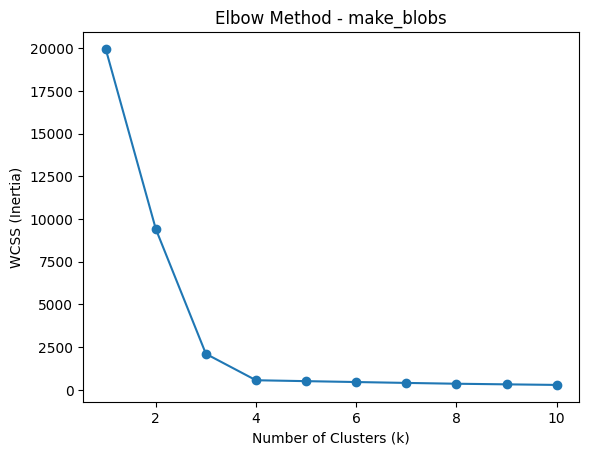

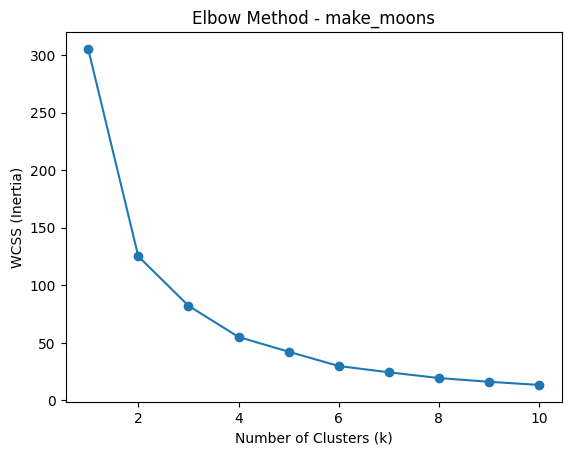

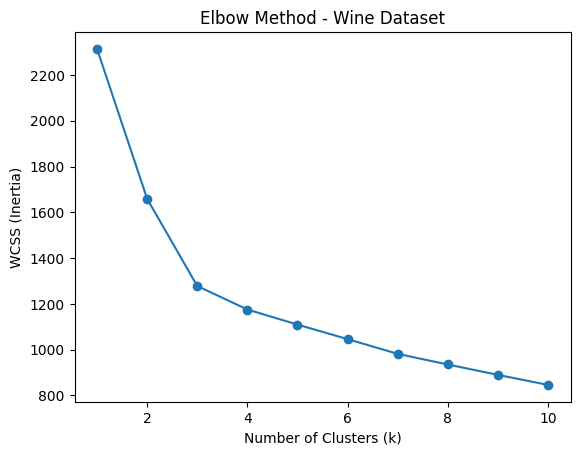

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons, load_wine
from sklearn.preprocessing import StandardScaler

# Function to plot elbow method
def plot_elbow(X, title):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss, marker='o')
    plt.title(f'Elbow Method - {title}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Inertia)')
    plt.show()

# 1. make_blobs dataset
X_blobs, _ = make_blobs(n_samples=300, centers=4, random_state=42)
plot_elbow(X_blobs, "make_blobs")

# 2. make_moons dataset
X_moons, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
plot_elbow(X_moons, "make_moons")

# 3. Wine dataset
wine = load_wine()
X_wine = StandardScaler().fit_transform(wine.data)
plot_elbow(X_wine, "Wine Dataset")


6.Generate synthetic data using make_blobs(n_samples=300, centers=4),
  apply KMeans clustering, and visualize the results with cluster centers.

   

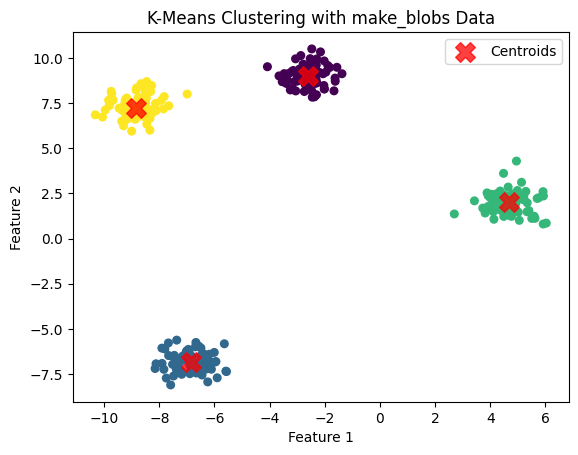

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering with make_blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


7.Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
  model. Print the number of clusters found (excluding noise).

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load Wine dataset
wine = load_wine()
X = wine.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN model (you may tune eps and min_samples)
dbscan = DBSCAN(eps=2.0, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Calculate number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 5


8.Generate moon-shaped synthetic data using
 make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
 the plot.

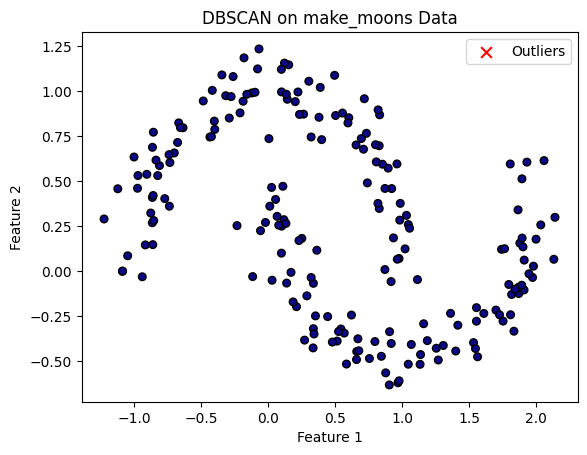

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=30, edgecolor='k')

# Highlight outliers (label = -1) in red
outliers = (labels == -1)
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=60, marker='x', label='Outliers')

plt.title("DBSCAN on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


9.Load the Wine dataset, reduce it to 2D using PCA, then apply
  Agglomerative Clustering and visualize the result in 2D with a scatter plot.

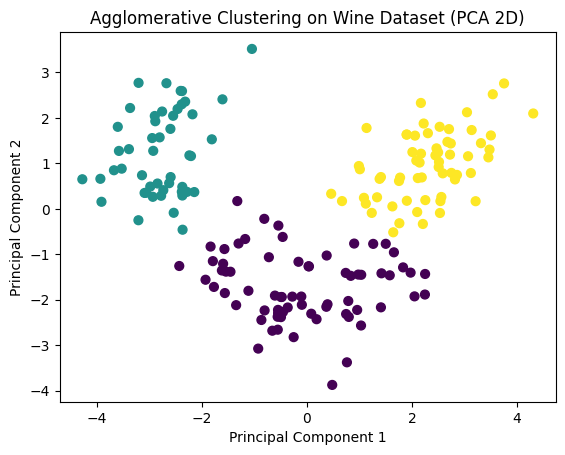

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load Wine dataset
wine = load_wine()
X = wine.data

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Reduce dimensions to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)  # wine dataset has 3 classes
labels = agg.fit_predict(X_pca)

# Plot results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40)
plt.title("Agglomerative Clustering on Wine Dataset (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


10.You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?

* Choice of Clustering Algorithm

K-Means Clustering

Works well for large datasets and when we expect compact, spherical clusters.

Fast and scalable → good for e-commerce data with thousands of customers.

DBSCAN or Hierarchical Clustering (as alternatives)

Useful if clusters are not spherical or if we want to detect outliers (e.g., rare high-value buyers).

Hierarchical can help understand nested relationships (e.g., premium vs. budget shoppers inside the same segment).
 I’d start with K-Means (for efficiency) and compare with DBSCAN to check if non-linear structures exist.

* Data Preprocessing

Handling Missing Values:

For demographics (e.g., age, income) → impute with median.

For categorical features (e.g., gender, location) → impute with mode or create a “missing” category.

Encoding Categorical Variables:

One-hot encode features like location, gender, or membership tier.

Feature Scaling:

Apply StandardScaler or MinMaxScaler so variables like “total spend” (large range) don’t dominate smaller-scale features (like purchase frequency).

Feature Engineering:

Create behavioral features: average order value, frequency of purchases, % spend per category, recency of last purchase.

* Determining the Number of Clusters

Elbow Method (K-Means): Plot inertia (WCSS) vs k to find the “elbow.”

Silhouette Score: Measure cluster separation and cohesion. Higher score → better clustering.

Domain Input: Marketing may want a practical number of clusters (e.g., 4–6 segments).

* Deliverables to Marketing Team

Customer Segments:

Example:

Segment 1: Budget, frequent buyers (low spend per order, high frequency).

Segment 2: Premium buyers (high spend per order, low frequency).

Segment 3: Occasional deal-seekers (low frequency, high seasonal purchases).

Segment 4: Loyal, all-category shoppers.

Actionable Insights:

Personalized promotions (discount codes for budget shoppers, exclusive offers for premium buyers).

Cross-selling opportunities (recommend electronics to fashion buyers with similar profiles).

Retention strategies (target occasional buyers with engagement campaigns).